# Nations and Conflict

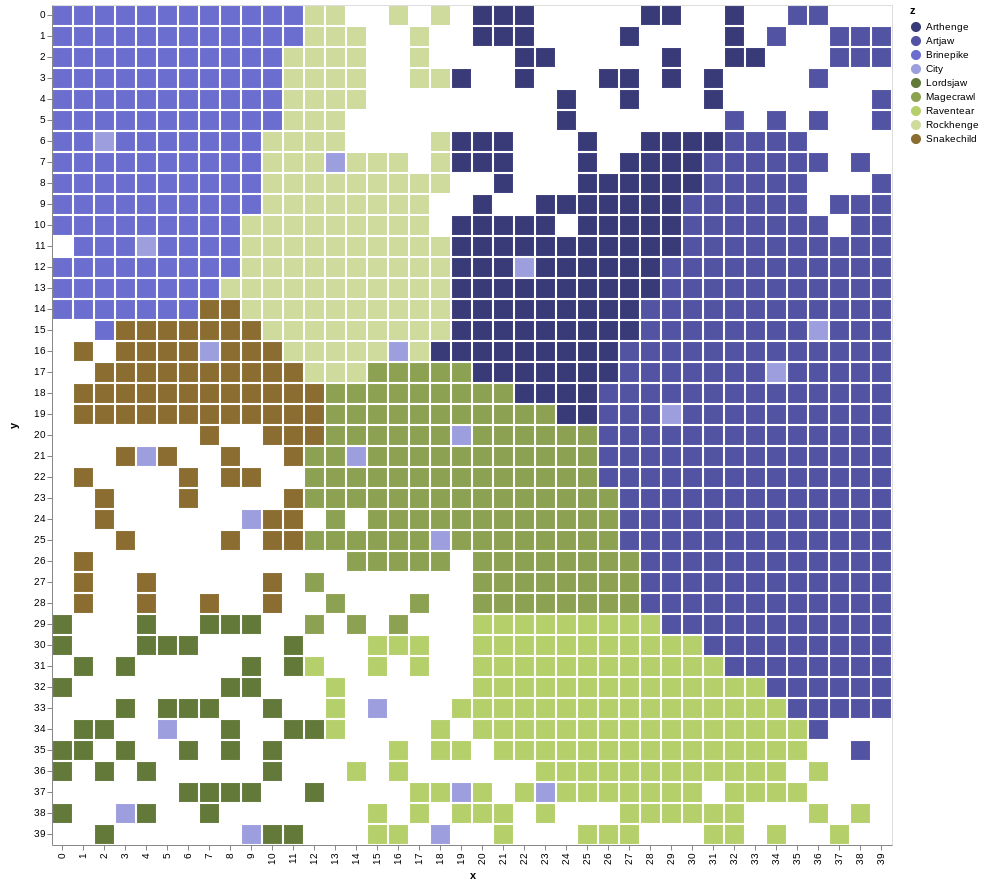

In [1]:
import pandas as pd
import numpy as np
import pickle

import altair as alt
#only using yaml for it's pretty printing feature. 
import yaml

# importing local libraries for drawings (because they clutter)
# in Github, you can search  
#   They should still be available within the git repo but it's pretty much template stuff from altair
import sys
sys.path.append('../')
sys.path.append('../../')
from lib.builders import towns,nations,people,events

import lib.drawMaps as draw

with (open('world_2.p', 'rb')) as pickle_file:
    world = pickle.load(pickle_file)
    
draw.drawboarders(world.df_features)

Now that we have `landscape`, `culture`, `nations`, `towns`, and `people` we can start building an interaction between them. 

We can start with a `world` that has `nations` and each `Nation` has `towns`. 

In [2]:
world.towns

[capitol of Camcombe: population: 3 location: [9,24] founded 0,
 capitol of Lionrest: population: 5 location: [4,11] founded 0,
 capitol of Fallglen: population: 4 location: [16,16] founded 0,
 capitol of Oakrun: population: 4 location: [15,33] founded 1,
 capitol of Stormhost: population: 3 location: [34,17] founded 1,
 town of Coremark: population: 2 location: [23,37] founded 2,
 town of Fallrise: population: 3 location: [7,16] founded 2,
 town of Godchild: population: 2 location: [19,37] founded 2,
 town of Splitrest: population: 2 location: [18,39] founded 3,
 capitol of Rocktown: population: 1 location: [22,12] founded 3,
 town of Ravenfold: population: 3 location: [36,15] founded 4,
 capitol of Artcrawl: population: 4 location: [14,21] founded 5,
 town of Coreridge: population: 3 location: [4,21] founded 5,
 town of Servantstown: population: 1 location: [3,38] founded 5,
 town of Hellkeep: population: 2 location: [2,6] founded 6,
 town of Servantscraft: population: 3 location: [1

In [3]:
town = world.towns[1]
print(f"{town.name} is loyal to the nation of {town.nation}")
print(f"{town.diplomacy}")

Lionrest is loyal to the nation of Brinepike
{'nation': 'Brinepike', 'national fealty': 1}


In [4]:
world.nations

[Nation of Magecrawl,
 Nation of Snakechild,
 Nation of Artjaw,
 Nation of Raventear,
 Nation of Brinepike,
 Nation of Arthenge,
 Nation of Lordsjaw,
 Nation of Rockhenge]

In [5]:
example_nation = world.nations[1]
print (example_nation.ruler," has a temperment of ",example_nation.ruler.temperment)
print (example_nation.get_capitol().speaker," has a loyalty of ",example_nation.get_capitol().speaker.loyalty)

Dragrah, Ruler of the nation of Snakechild, residing in Camcombe  has a temperment of  0.5759307944710405
Studdand, Speaker of Camcombe, residing in Camcombe  has a loyalty of  0.5


In [6]:
example_nation.towns

[capitol of Camcombe: population: 3 location: [9,24] founded 0,
 town of Fallrise: population: 3 location: [7,16] founded 2,
 town of Coreridge: population: 3 location: [4,21] founded 5]

## Swaying favor with other nations

Events cause the relationship to sway between nations. This can be done by passing the `nation` or list of `nation` objects into the `alter_favor` function. 

In [7]:
nations.treaties

,stance,favor
0,sworn enemies,0.0
1,war,0.1
2,tense,0.3
3,peace,0.6
4,allies,0.9


In [8]:
help(nations.alter_favor)

Help on function alter_favor in module lib.builders.nations:

alter_favor(s, o, a)
    s = the target nation(s) (obj or list). s will not change. O's favor of s will change.
    o = the nation(s) (obj or list) who's favor is change. O's favor of s will change
    
    Examples:
    (a,[o]) each nation in o's favor of a is changed by s
    (a,o) o's favor of a is changed by s
    ([a],o) o's favor of each nation in a is changed by s
    s = amount of change (int)
    
    national relationship with itself doesn't decay, but town and person loyalty can.



### example 1: one nation does something that many other nations's don't like. 

In [9]:
s_nation = world.nations[0]
o_nations = world.nations[1:3]
affect = -.25
nations.alter_favor(s_nation,o_nations,affect)

In [10]:
print("subject nations (nations who have done the deed)")
print(f"{s_nation} did something {affect} to {o_nations}")
print(s_nation,"\n",yaml.dump(s_nation.diplomacy))

print("object nations (nations who's favor is affected by the deed)")
[print(j,"\n",yaml.dump(j.diplomacy)) for j in o_nations]


subject nations (nations who have done the deed)
Nation of Magecrawl did something -0.25 to [Nation of Snakechild, Nation of Artjaw]
Nation of Magecrawl 
 Arthenge:
  favor: 0.8
  stance: peace
Artjaw:
  favor: 0.8
  stance: peace
Brinepike:
  favor: 0.8
  stance: peace
Lordsjaw:
  favor: 0.8
  stance: peace
Raventear:
  favor: 0.8
  stance: peace
Rockhenge:
  favor: 0.8
  stance: peace
Snakechild:
  favor: 0.8
  stance: peace

object nations (nations who's favor is affected by the deed)
Nation of Snakechild 
 Arthenge:
  favor: 0.8
  stance: peace
Artjaw:
  favor: 0.8
  stance: peace
Brinepike:
  favor: 0.8
  stance: peace
Lordsjaw:
  favor: 0.8
  stance: peace
Magecrawl:
  favor: 0.55
  stance: tense
Raventear:
  favor: 0.8
  stance: peace
Rockhenge:
  favor: 0.8
  stance: peace

Nation of Artjaw 
 Arthenge:
  favor: 0.8
  stance: peace
Brinepike:
  favor: 0.8
  stance: peace
Lordsjaw:
  favor: 0.8
  stance: peace
Magecrawl:
  favor: 0.55
  stance: tense
Raventear:
  favor: 0.8
  sta

[None, None]

### example 2: several nations does something that annother nation likes. 

In [11]:
s_nations = world.nations[2:4]
o_nation = world.nations[5]
affect = .25

nations.alter_favor(s_nations,o_nation,affect)

In [12]:
print("subject nations (nations who have done the deed)")
print(f"{s_nations} did something {affect} to {o_nation}")
[print(j,"\n",yaml.dump(j.diplomacy)) for j in s_nations]
print("object nations (nations who's favor is affected by the deed)")
print(o_nation,"\n",yaml.dump(o_nation.diplomacy))

subject nations (nations who have done the deed)
[Nation of Artjaw, Nation of Raventear] did something 0.25 to Nation of Arthenge
Nation of Artjaw 
 Arthenge:
  favor: 0.8
  stance: peace
Brinepike:
  favor: 0.8
  stance: peace
Lordsjaw:
  favor: 0.8
  stance: peace
Magecrawl:
  favor: 0.55
  stance: tense
Raventear:
  favor: 0.8
  stance: peace
Rockhenge:
  favor: 0.8
  stance: peace
Snakechild:
  favor: 0.8
  stance: peace

Nation of Raventear 
 Arthenge:
  favor: 0.8
  stance: peace
Artjaw:
  favor: 0.8
  stance: peace
Brinepike:
  favor: 0.8
  stance: peace
Lordsjaw:
  favor: 0.8
  stance: peace
Magecrawl:
  favor: 0.8
  stance: peace
Rockhenge:
  favor: 0.8
  stance: peace
Snakechild:
  favor: 0.8
  stance: peace

object nations (nations who's favor is affected by the deed)
Nation of Arthenge 
 Artjaw:
  favor: 1
  stance: allies
Brinepike:
  favor: 0.8
  stance: peace
Lordsjaw:
  favor: 0.8
  stance: peace
Magecrawl:
  favor: 0.8
  stance: peace
Raventear:
  favor: 1
  stance: al

Events are thier own thing. They aren't `culture` or `landscape`. They only happen in the begging of the game to add dynamics to the world. 

In [13]:
e = events.Events(paths="notebooks")

 `culture.eons` determines how many years will pass with a possibility of an event happening. `culture.chaos` determines how likely an event is to occur.

In [14]:
world.culture.eons,world.culture.chaos

(10, 0.6)

In [15]:
#now to run through the eons and let fate happen
all_events = events.pass_through_time(world,e.events_df,nations)
all_events

['0: a great temple was founded in the nation of [Nation of Raventear]',
 '1: raiders from [Nation of Arthenge], plundered [Nation of Artjaw, Nation of Arthenge, Nation of Snakechild]',
 '2: raiders from [Nation of Arthenge], plundered [Nation of Raventear, Nation of Rockhenge, Nation of Brinepike]',
 '3: nothing happend during this period.',
 '4: a great temple was founded in the nation of [Nation of Arthenge]',
 '5: nothing happend during this period.',
 '6: nothing happend during this period.',
 '7: a great temple was founded in the nation of [Nation of Magecrawl]',
 '8: nothing happend during this period.',
 '9: nothing happend during this period.']

In [16]:
print("Ending relationships between nations")
for j in world.nations:
    print(j,"\n",yaml.dump(j.diplomacy))

Ending relationships between nations
Nation of Magecrawl 
 Arthenge:
  favor: 0.8
  stance: peace
Artjaw:
  favor: 0.8
  stance: peace
Brinepike:
  favor: 0.8
  stance: peace
Lordsjaw:
  favor: 0.8
  stance: peace
Raventear:
  favor: 0.8
  stance: peace
Rockhenge:
  favor: 0.8
  stance: peace
Snakechild:
  favor: 0.8
  stance: peace

Nation of Snakechild 
 Arthenge:
  favor: 0.65
  stance: peace
Artjaw:
  favor: 0.8
  stance: peace
Brinepike:
  favor: 0.8
  stance: peace
Lordsjaw:
  favor: 0.8
  stance: peace
Magecrawl:
  favor: 0.55
  stance: tense
Raventear:
  favor: 0.8
  stance: peace
Rockhenge:
  favor: 0.8
  stance: peace

Nation of Artjaw 
 Arthenge:
  favor: 0.65
  stance: peace
Brinepike:
  favor: 0.8
  stance: peace
Lordsjaw:
  favor: 0.8
  stance: peace
Magecrawl:
  favor: 0.55
  stance: tense
Raventear:
  favor: 0.8
  stance: peace
Rockhenge:
  favor: 0.8
  stance: peace
Snakechild:
  favor: 0.8
  stance: peace

Nation of Raventear 
 Arthenge:
  favor: 0.65
  stance: peace


In [17]:
with open('world_3.p', 'wb') as pickle_file:
    pickle.dump(world, pickle_file)